<a href="https://colab.research.google.com/github/vivek6311/Artificial-Intelligence-with-Python/blob/master/LR%26LR_TLP23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [ ]:
# We will do an end-to-end machine learning project. We will not delve into the details 
# of he machine learning model but treat it as a black-box for now. However, we will look 
# at lengths on data pre-processing, model selection as well as understanding the 
# performance of the model
#
# We will use the California housing data for this exercise
# Adapted from A. Geron, Hands-on Machine Learning with Scikit-Learn and TensorFlow, O’ Reilly, 2017

In [1]:
# Get the data from the website to the local directory

import os
import tarfile
from six.moves import urllib

source_path = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz"
local_path = os.path.join("datasets", "housing")

os.makedirs(local_path, exist_ok=True)
tgz_path = os.path.join(local_path, "housing.tgz")
urllib.request.urlretrieve(source_path, tgz_path)
housing_tgz = tarfile.open(tgz_path)
housing_tgz.extractall(path=local_path)
housing_tgz.close()

In [2]:
# Read the data into a dataframe
import pandas as pd

csv_path = os.path.join(local_path, "housing.csv")
data = pd.read_csv(csv_path)

In [3]:
# Let us get some information on the data
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Let us see what features there are
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# Let us get some statistical information on each feature
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# We can dive more into a specific feature as well
data["median_income"].value_counts()

3.1250     49
15.0001    49
2.8750     46
2.6250     44
4.1250     44
           ..
4.0774      1
4.1767      1
6.1814      1
6.4319      1
2.0943      1
Name: median_income, Length: 12928, dtype: int64

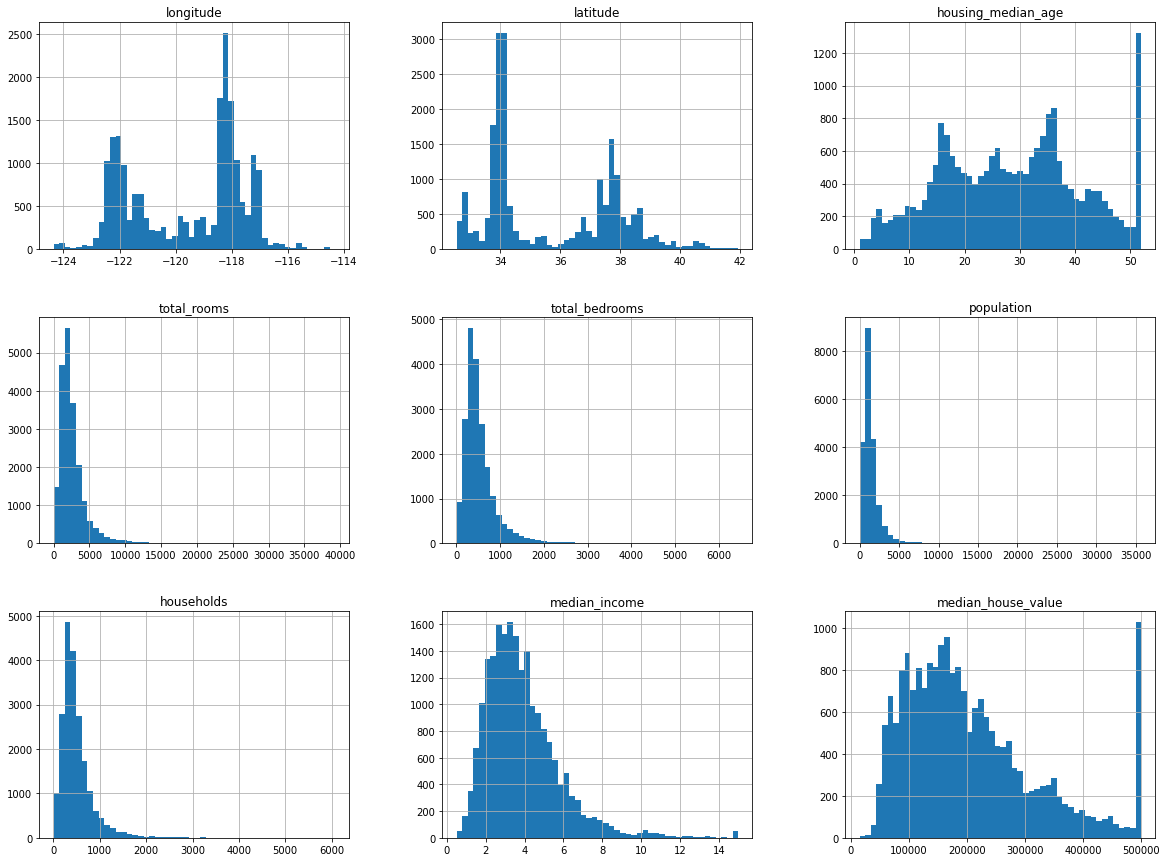

In [ ]:
# We can also see the distribution of each feature. Recall our discussion in math class workshop on the 
# many things that the distribution suggests - multi-mode distribution, heavy tailed 
# distribution etc. 
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(20,15))
plt.show()

In [5]:
# Let us set up some data for training and some for testing
# Say 80% for training and 20% for testing

import numpy as np
shuffled_indices = np.random.permutation(len(data))
test_set_size = int(len(data) * 0.2)
test_indices = shuffled_indices[:test_set_size]
train_indices = shuffled_indices[test_set_size:]
train_data = data.iloc[train_indices]
test_data = data.iloc[test_indices]

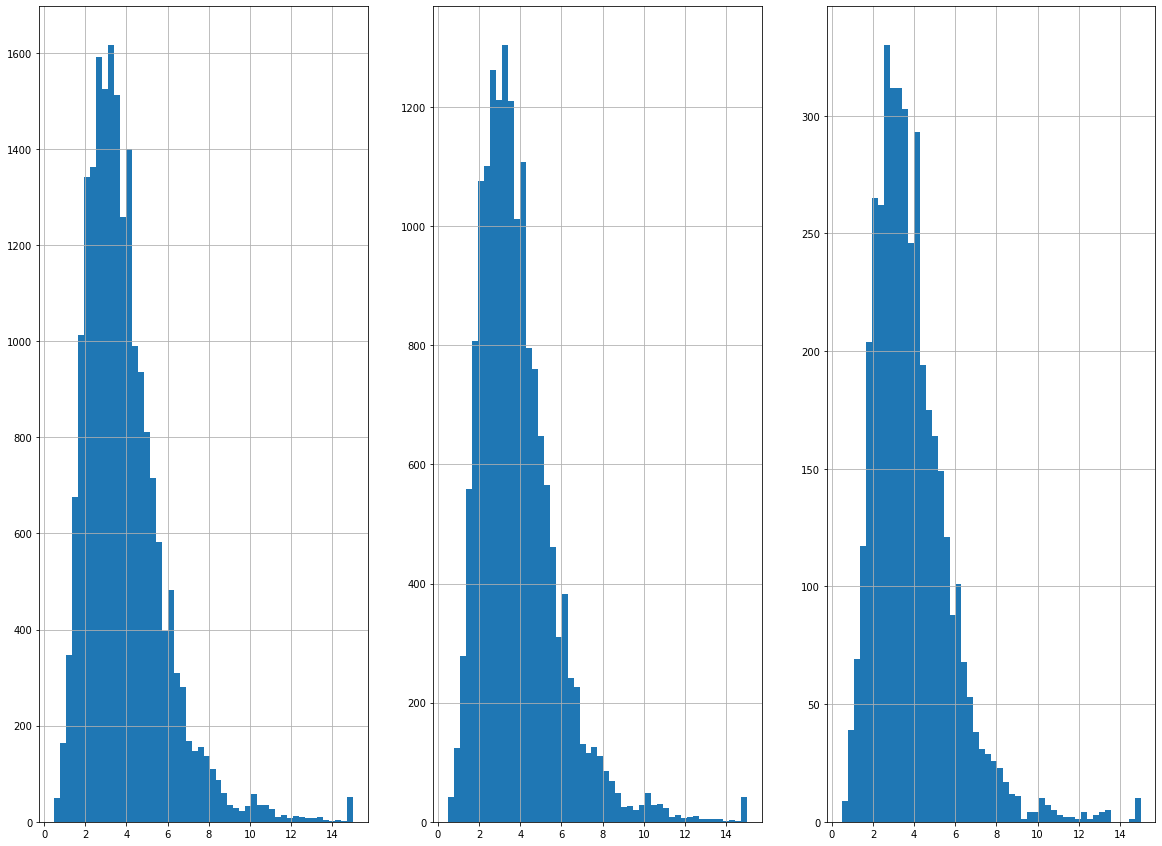

In [ ]:
# This often leads to a problem. The distribution of the training data might not 
# resemble the distribution of the overall data
plt.subplot(1,3,1)
data["median_income"].hist(bins=50, figsize=(20,15))
plt.subplot(1,3,2)
train_data["median_income"].hist(bins=50, figsize=(20,15))
plt.subplot(1,3,3)
test_data["median_income"].hist(bins=50, figsize=(20,15))

In [ ]:
# A better way to do this is through stratified sampling
# We will choose income for stratified sampling. Why? 

corr = data.corr()
corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [ ]:
# Create strata and then sample. 

data["income_cat"] = np.ceil(data["median_income"] / 1.5)
# Label those above 5 as 5
data["income_cat"].where(data["income_cat"] > 5, 5.0, inplace=True)

In [ ]:
# Now do the stratified sampling

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["income_cat"]):
    strat_train_data = data.loc[train_index]
    strat_test_data = data.loc[test_index]

<bound method StratifiedShuffleSplit.split of StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)>


In [ ]:
# Test data
strat_test_data["income_cat"].value_counts() / len(strat_test_data)

5.0     0.954457
6.0     0.025678
7.0     0.009205
8.0     0.005087
9.0     0.002422
11.0    0.002422
10.0    0.000727
Name: income_cat, dtype: float64

In [ ]:
# Original data
data["income_cat"].value_counts() / len(data)

5.0     0.954506
6.0     0.025775
7.0     0.009157
8.0     0.005087
9.0     0.002422
11.0    0.002374
10.0    0.000678
Name: income_cat, dtype: float64

In [ ]:
# We now prepare the data

train_data_i = strat_train_data.drop("median_house_value", axis=1) 
train_data_o = strat_train_data["median_house_value"].copy()

In [ ]:
train_data_i.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
16659,-120.67,35.30,32.0,4202.0,986.0,2309.0,956.0,2.2165,NEAR OCEAN,5.0
19735,-121.80,40.34,26.0,4815.0,910.0,1341.0,539.0,2.8810,INLAND,5.0
1566,-121.96,37.74,2.0,200.0,20.0,25.0,9.0,15.0001,<1H OCEAN,11.0
16430,-121.35,38.09,32.0,1706.0,292.0,923.0,284.0,5.5057,INLAND,5.0
9111,-118.15,34.59,33.0,2111.0,429.0,1067.0,397.0,3.7344,INLAND,5.0


In [ ]:
# Let us check if there are any missing values. 

incomplete_rows = train_data_i[train_data_i.isnull().any(axis=1)].head()
incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
6421,-117.99,34.14,30.0,2346.0,NaN,1988.0,474.0,2.5625,INLAND,5.0
7547,-118.20,33.92,45.0,1283.0,NaN,1025.0,248.0,3.2798,<1H OCEAN,5.0
9622,-120.32,37.29,38.0,576.0,NaN,478.0,112.0,2.3382,INLAND,5.0
16105,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,NEAR OCEAN,5.0
3778,-118.40,34.17,24.0,6347.0,NaN,2945.0,1492.0,3.3545,<1H OCEAN,5.0


In [ ]:
# We can drop the missing rows

incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat


In [ ]:
# We can drop the attribute

incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity,income_cat
6421,-117.99,34.14,30.0,2346.0,1988.0,474.0,2.5625,INLAND,5.0
7547,-118.20,33.92,45.0,1283.0,1025.0,248.0,3.2798,<1H OCEAN,5.0
9622,-120.32,37.29,38.0,576.0,478.0,112.0,2.3382,INLAND,5.0
16105,-122.50,37.75,44.0,1819.0,1137.0,354.0,3.4919,NEAR OCEAN,5.0
3778,-118.40,34.17,24.0,6347.0,2945.0,1492.0,3.3545,<1H OCEAN,5.0


In [ ]:
# We can fill in missing values with somethign like the median. Ideally
# you can fill based on regressing against the other variables

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
train_data_i_num = train_data_i.drop('ocean_proximity', axis=1) # median does not exist for categorical attribute


In [ ]:
imputer.fit(train_data_i_num)

SimpleImputer(strategy='median')

In [ ]:
imputer.fit

<bound method SimpleImputer.fit of SimpleImputer(strategy='median')>

In [ ]:
X = imputer.transform(train_data_i_num)

In [ ]:
# We can one-hot encode the categorical variable

train_data_i_cat = train_data_i[['ocean_proximity']]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
train_data_i_cat_encoded = ordinal_encoder.fit_transform(train_data_i_cat)
train_data_i_cat_encoded[:20]

array([[4.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [3.],
       [0.],
       [0.],
       [3.],
       [1.],
       [1.],
       [1.]])

In [ ]:
# A powerful thing that can be done is a pipeline which has a sequence of 
# steps. So, let us fill missing values with the median and scale 
# everything to be in [-1,+1]

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

train_data_i_num_tr = num_pipeline.fit_transform(train_data_i_num)
train_data_i_num_tr

array([[-0.5502143 , -0.15255473,  0.26789644, ...,  1.17825748,
        -0.87025017, -0.17624561],
       [-1.11427484,  2.212913  , -0.20767267, ...,  0.09770133,
        -0.52052389, -0.17624561],
       [-1.19414182,  0.99263203, -2.10994909, ..., -1.27566739,
         5.85775702, 12.0427922 ],
       ...,
       [-1.15420833,  0.85183037, -0.92102633, ..., -0.53974905,
         0.73796439, -0.17624561],
       [ 0.63780702, -0.772082  ,  1.37755769, ..., -0.64080826,
        -1.29776356, -0.17624561],
       [-0.63008128,  1.00671219, -0.68324177, ..., -0.25989279,
        -1.15476788, -0.17624561]])

In [ ]:
# Likewise we can do a pipeline for transforming the categorical
# attribute to one-hot encoding and create a combo pipeline in one shot

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(train_data_i_num)
cat_attribs = list(train_data_i_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

train_data_i_prepared = full_pipeline.fit_transform(train_data_i)

In [ ]:
train_data_i_prepared

array([[-0.5502143 , -0.15255473,  0.26789644, ...,  0.        ,
         0.        ,  1.        ],
       [-1.11427484,  2.212913  , -0.20767267, ...,  0.        ,
         0.        ,  0.        ],
       [-1.19414182,  0.99263203, -2.10994909, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.15420833,  0.85183037, -0.92102633, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.63780702, -0.772082  ,  1.37755769, ...,  0.        ,
         0.        ,  0.        ],
       [-0.63008128,  1.00671219, -0.68324177, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_data_i_prepared, train_data_o)

LinearRegression()

In [ ]:
# Let us see the prediction

some_data = train_data_i.iloc[:5]
some_labels = train_data_o.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
#print()
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [222292.53825575 100542.81115615 557023.45494332 230973.37139408
 171518.3184464 ]


In [ ]:
# These are the desired values

print("Labels:", list(some_labels))

Labels: [231700.0, 79800.0, 350000.0, 147200.0, 111400.0]


In [ ]:
# Check performance on the testing data

from sklearn.metrics import mean_squared_error

X_test = strat_test_data.drop("median_house_value", axis=1) 
y_test = strat_test_data["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = lin_reg.predict(X_test_prepared)
final_mse = mean_squared_error(y_test,final_predictions) 
final_rmse = np.sqrt(final_mse)


In [ ]:
final_rmse

66977.12299898184

# Logistic Regression

In [ ]:
# end to end classification using logistic regression
# use digit dataset

In [ ]:
# Get the data
import os
import numpy as np
import sklearn
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, classification_report
from sklearn.model_selection import cross_val_predict
from sklearn import datasets

In [ ]:
D = sklearn.datasets.load_digits()
X,y = D["data"], D["target"]

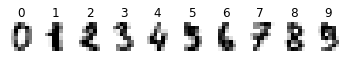

In [ ]:
# digits are 8*8
import matplotlib as mpl
import matplotlib.pyplot as plt

for i in range(10):
  a = X[i]
  aa = a.reshape(8,8)
  plt.subplot(1,10,i+1)
  plt.imshow(aa, cmap = mpl.cm.binary, interpolation="nearest")
  plt.axis("off")
  plt.title(y[i])

plt.show()

In [ ]:
# create a 2 class classification problem
# digit 6 vs other digits
# 20% for testing and rest for training

data_i = np.copy(X)
data_o = np.copy(y)

for i in range(len(data_o)):
  if (data_o[i] == 6):
    data_o[i] = 1
  else :
    data_o[i] = 0

#print(data_o[:100])

shuffled_indices = np.random.permutation(len(D))
split = int(len(data_i)* 0.8)
train_data_i = data_i[:split]
train_data_o = data_o[:split]
test_data_i = data_i[split:]
test_data_o = data_o[split:]

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

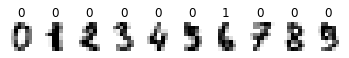

In [ ]:
for i in range(10):
  a = train_data_i[i]
  aa = a.reshape(8,8)
  plt.subplot(1,10,i+1)
  plt.imshow(aa, cmap = mpl.cm.binary, interpolation="nearest")
  plt.axis("off")
  plt.title(train_data_o[i])

plt.show()

In [ ]:
# using a very plain logistic rgression model
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression(penalty ="none", random_state = 0, max_iter = 10000, solver = "saga")
clf.fit(train_data_i,train_data_o)

LogisticRegression(max_iter=10000, penalty='none', random_state=0,
                   solver='saga')

In [ ]:
# what would happen if we do this?
# clf.fit(clf.intercept_,clf.coef_)

calculated_output_prob = clf.predict_proba(test_data_i)
loss = sklearn.metrics.log_loss(test_data_o,calculated_output_prob, normalize = False)

In [ ]:
loss

8.422919293675573

/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]')

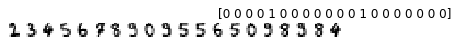

In [ ]:
# now to see something graphically
a = test_data_i[:20]
out = clf.predict(a)

for i in range(20):
  aa = a[i].reshape(8,8)
  plt.subplot(1,20,i+1)
  plt.imshow(aa,cmap = mpl.cm.binary, interpolation="nearest")
  plt.axis("off")

plt.title(out)

In [ ]:
# ideally do this
# above mentioned single split between train and test was to show you the mechanics behind it incase you needed it

from sklearn.model_selection import cross_val_score
cross_val_score(clf,data_i, data_o, cv=3, scoring = "accuracy")

array([0.99499165, 0.9933222 , 0.98163606])

In [ ]:
# look at confusion matrix
pred = cross_val_predict(clf,data_i, data_o, cv=3)
confusion_matrix(data_o,pred)

array([[1605,   11],
       [   7,  174]])

In [ ]:
# precision (TP/(TP+FP))
precision_score(data_o,pred)
# The precision score is a useful measure of the success of prediction when the classes are very imbalanced.

0.9405405405405406

In [ ]:
# Recall (TP/(TP+FN))
recall_score(data_o,pred)
#Recall is also known as sensitivity or the true positive rate. A high recall score indicates that the model is good at identifying positive examples.

0.9613259668508287

In [ ]:
# F1 score (harmonic mean of precision and recall). F1 favours if precision and recall is the same
# most cases, we prefer one over the other
f1_score(data_o, pred)

0.9508196721311475

In [ ]:
print(classification_report(data_o, pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1616
           1       0.94      0.96      0.95       181

    accuracy                           0.99      1797
   macro avg       0.97      0.98      0.97      1797
weighted avg       0.99      0.99      0.99      1797



In [ ]:
# now to see sparsity
sparsity = np.mean(clf.coef_ ==0) * 100
print(sparsity)

4.6875


In [ ]:
# logistic regression with l2
# if you want, you can also try l1
# suggestion is to play around with hyper parameters until you find best fit

clf1 = LogisticRegression(penalty = "l2", C = 0.0000001, max_iter = 1000000, solver="sag")
clf1.fit(train_data_i, train_data_o)

LogisticRegression(C=1e-07, max_iter=1000000, solver='sag')

In [ ]:
sparsity = np.mean(clf1.coef_ == 0) *100
print(sparsity)

4.6875


In [ ]:
## k-fold